## Final Project Submission

Please fill out:
* Student name: Jenyl Murdock
* Student pace: part time 
* Scheduled project review date/time: May 2, 2019, 1pm
* Instructor name: Joe San Pietro
* Blog post URL:


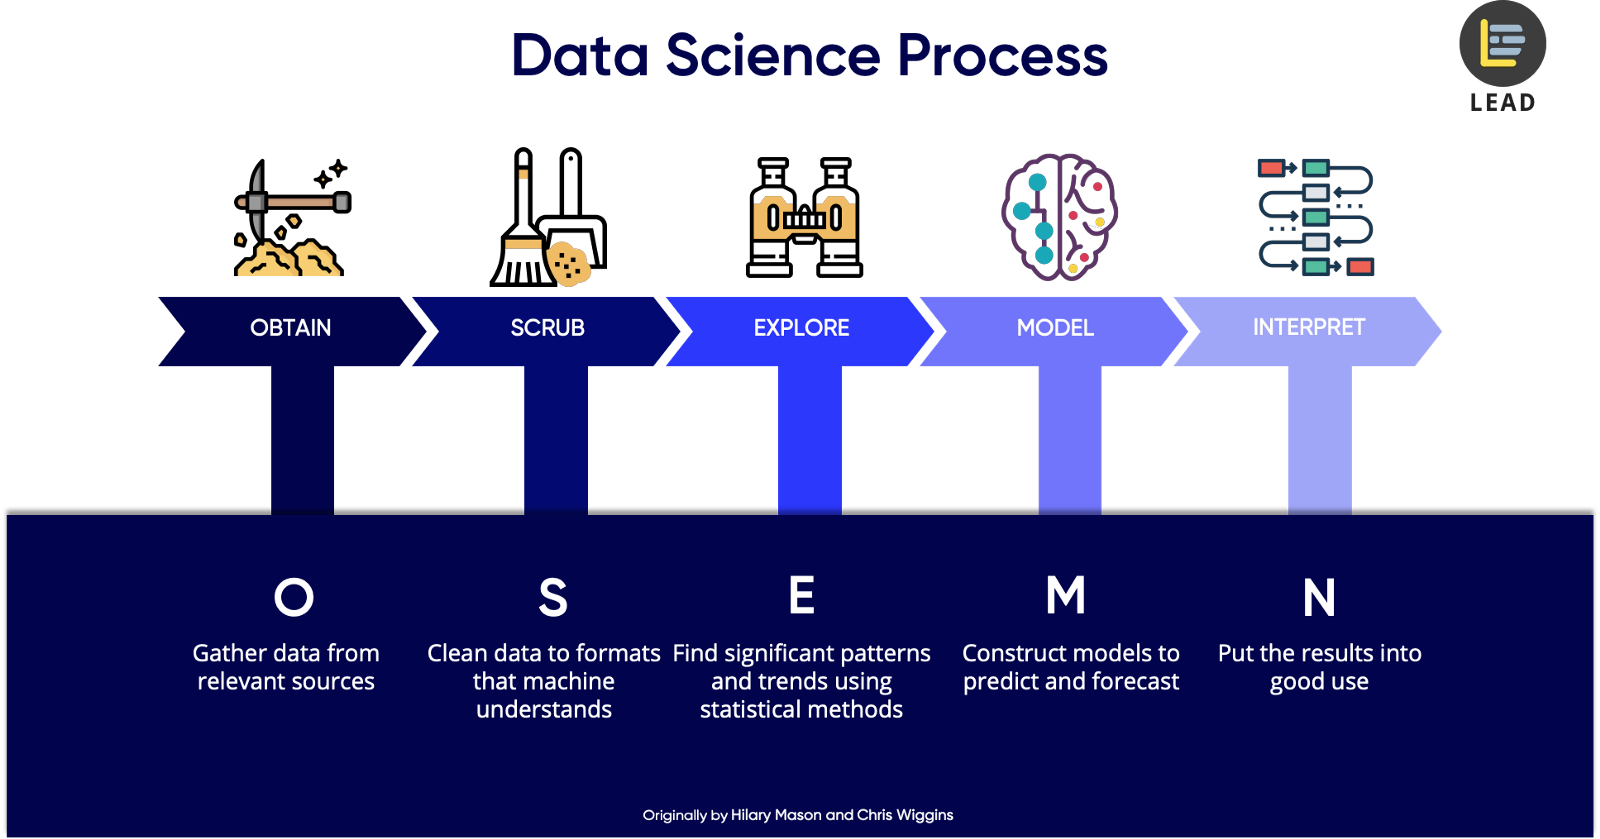

**_Obtain_**:

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**_Scrub_**:

During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**_Explore_**:

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**_Model_**:

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**_Interpret_**:

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  


## Loading the Data

In [1]:
# access the data file and get a visual of the information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for multicollinearity
import seaborn as sns

# look at results for each linear regression model using statsmodels
import statsmodels.formula.api as smf

kc = pd.read_csv('kc_house_data.csv')
print ('shape of the data -', kc.shape)
kc.head(10)

shape of the data - (21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570



## Our Data

We've given a dataset with housing prices and other features, such as size of the house, how many bedrooms, overall condition and others. Let's take a look at features we have and their meaning:

-  id - A notation for a house
-  date - Date house was sold
-  price - Price is prediction target
-  bedrooms Number of Bedrooms/House
-  bathrooms - Number of bathrooms/bedrooms
-  sqft_living - Square footage of the home
-  sqft_lot - Square footage of the lot
-  floors - Total floors (levels) in house
-  waterfront - House which has a view to a waterfront
-  view - Has a scenic view
-  condition - How good the condition is ( Overall )
-  grade - Overall grade given to the housing unit, based on King County grading system
-  sqft_above - square footage of house apart from basement
-  sqft_basement - square footage of the basement
-  yr_built - Built Year
-  yr_renovated - Year when house was renovated
-  zipcode - Zipcode
-  lat - Latitude coordinate
-  long - Longitude coordinate
-  sqft_living15 - Living space of surrounding 15 properties 
-  sqft_lot15 - Lot size area of surrounding 15 properties





## Scrubbing Data
During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.

### 1.  Dealing with missing data or null values
In order to build a model on the dataset, we need to make sure that the dataset contains no Nan (null) values in any cells.

In [2]:
# The id column is not needed so it can be dropped from the data
kc = kc.drop(['id'], axis=1)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


B.  Remove null values

In [3]:
# Check for null values in the dataset 
kc.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View has 63 null values.  Because this is not a significant number, these can be dropped from our data

In [4]:
print (kc.view.unique())
print (kc.view.value_counts())

[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [5]:
# select only the data for where the view is not a nan value
# convert view to data type string so the 'nan' data can be dropped
kc['view'] = kc.view.astype(str)
kc = kc[kc.view != 'nan'] 
kc['view'] = kc.view.astype(float)

# replace null values with 0 in waterfront column and change to data type integer
kc.waterfront = kc.waterfront.fillna(value=0)

# replace null values in yr_renovated with 0 and change to data type integer
kc.yr_renovated = kc.yr_renovated.fillna(value=0)


In [6]:
# Verify that there are not any more null values
kc.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2. Dealing with data types

Machine learning algorithms works only with numerical data, so it's important to check our data for types and make necessary changes to it

In [7]:
# check to see how each column is categorized
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [8]:
kc.floors.value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [9]:
print(kc.bathrooms.value_counts())
kc = kc[kc['bathrooms'] < 6]

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


**_TYPES OF BATHS (FULL, ¾, HALF, ¼)_**

There are different types of bathroom classifications and they are denoted by the different fixtures that they contain.

A full bath refers to a restroom that has
    a toilet,
    a sink or washbasin,
    and a shower
    and a bathtub.

A master bath is usually a full bath because it contains all the elements of a full bath.

A three-quarter bathroom is a bathroom that includes
    a sink,
    a shower,
    and a toilet,
    without a bathtub.

A half bathroom is a room that has
both a toilet
and a sink or washbasin
but NOT a shower or bathtub.

A one-quarter bath requires the least amount of space because it is
just a toilet.

In [10]:
# Start with an initial data type conversion
# For columns that are obviouly categorized wrong, convert them to an appropriate data type
kc['date'] = pd.to_datetime(kc.date)

# set view, waterfront & yr_renovated as integer
kc['view'] = kc.view.astype(int)
kc['waterfront'] = kc.waterfront.astype(int)
kc['yr_renovated'] = kc.yr_renovated.astype(int)

In [11]:
# Check columns for unusable data by looking at the unique values for each variable
# change to correct data type as needed

kc.condition.unique()

kc.grade.unique()

kc.sqft_living.unique() 
kc.sqft_lot.unique()
kc.sqft_above.unique()

# Bedrooms has one extreme outlier.  Let's look at the unique values.
kc.bedrooms.unique()
print ('bedroom value counts:', kc.bedrooms.value_counts())
kc = kc[kc['bedrooms'] < 7]
                   
kc.sqft_basement.unique()

(kc.sqft_basement =='?').sum()  # there are 450 '?' in this column
(kc.sqft_basement == '0.0').sum()  # there are 12798 '0.0' values in this column

# Replace the '?' values with 0 in the sqft_basement data
kc['sqft_basement'] = (kc['sqft_basement'].replace('?', 0)).astype(float)
kc['sqft_basement'] = kc['sqft_basement'].astype(int)

# Instead of square feet values for the basement, let's just use a categorical value of 1 for if it has a basement
# and 0 for if it does not have a basement.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['basement'] = kc['sqft_basement'].apply(lambda row: 0 if row == 0 else 1)

print ('\nview value counts:', kc['view'].value_counts())

# A significant majority of the values for the variable view are 0, let's just use a categorical value of 1 for 
# if it has a view and 0 for if it does not have a view.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb

kc['has_view'] = kc['view'].apply(lambda row: 1 if row != 0 else 0)
print ('\nhas_view values:', kc['has_view'].unique())
                

bedroom value counts: 3     9791
4     6865
2     2754
5     1588
6      267
1      196
7       36
8       12
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

view value counts: 0    19366
2      952
3      505
1      327
4      311
Name: view, dtype: int64

has_view values: [0 1]


0       20726
2014       73
2003       30
2007       30
2013       30
2000       29
2005       28
1990       22
2004       22
2006       20
1989       20
2009       20
2002       17
1998       16
1991       16
2001       15
1984       15
1983       15
2008       15
1994       14
1986       14
1985       14
1999       14
2015       14
2010       14
1987       13
1992       13
1993       12
1997       12
1996       11
        ...  
1975        5
1964        5
1969        4
1981        4
1965        4
1973        4
1963        4
1958        3
1956        3
1945        3
1978        3
1955        3
1960        3
1972        3
1940        2
1957        2
1962        2
1967        2
1974        2
1951        1
1953        1
1946        1
1954        1
1950        1
1948        1
1934        1
1959        1
1971        1
1944        1
1976        1
Name: yr_renovated, Length: 70, dtype: int64

0       21200
2014       73
2013       30
2007       30
2005       28
2009       20
2006       20
20

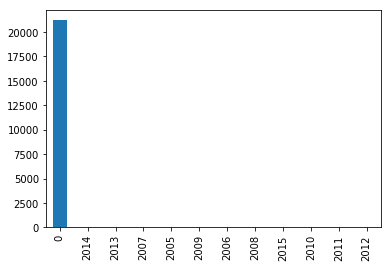

In [12]:
print(kc['yr_renovated'].value_counts())

# anything renovated before 2005 is 10 years old already
years = kc.loc[:,'yr_renovated']
for year in years:
    if year < 2005:
        kc['yr_renovated'] = (kc['yr_renovated'].replace(year, 0)).astype(int)
print ()
print (kc['yr_renovated'].value_counts())
kc['yr_renovated'].value_counts().plot(kind='bar')

In [13]:
# Convert the year built to reflect the age of the house. This format will be easier to visualize
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['yr_built'].describe()
kc['age'] = (kc.yr_built.max() - kc.yr_built + 1)
kc = kc.drop(['yr_built'], axis=1)
kc.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,has_view,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,98178,47.5112,-122.257,1340,5650,0,0,61
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,0,98125,47.7210,-122.319,1690,7639,1,0,65


In [14]:
# Get the range of zip codes and calculate bin size based on water locations 
kc.zipcode.describe()

count    21461.000000
mean     98077.930712
std         53.516313
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [15]:
kc.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98146, 98038,
       98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98032, 98045, 98102, 98077, 98198, 98108, 98168, 98177,
       98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
       98106, 98072, 98188, 98065, 98014, 98055, 98039])

/Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


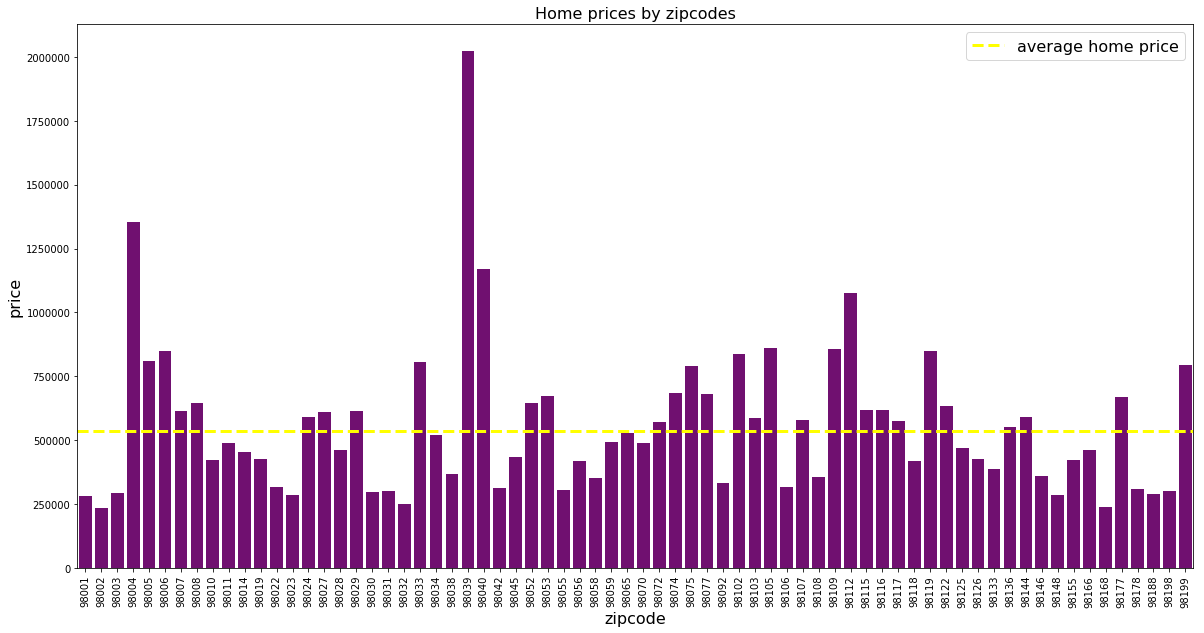

In [16]:
# plot home prices in zipcodes
# https://github.com/stevhliu/predicting-house-sales-price/blob/master/multivariable_linreg.ipynb

f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(kc['zipcode'], kc['price'], ci = False, color = 'purple')

# draw line for average home price
ax.axhline(y = kc['price'].mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average home price')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Home prices by zipcodes', fontsize = 16)
plt.xlabel('zipcode', fontsize = 16)
plt.ylabel('price', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()



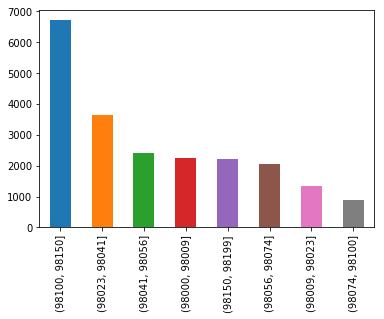

In [17]:
# create bins for zipcode
bins = [98000, 98009, 98023, 98041, 98056, 98074 , 98100 , 98150, 98199]
bins_zip = pd.cut(kc['zipcode'], bins)
bins_zip.value_counts().plot(kind='bar')

In [18]:
# replace the existing zipcode column
kc['zipcode'] = bins_zip
kc['zipcode'] = kc['zipcode'].cat.codes

In [19]:
# Check that all data is converted to appropriate data type
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21461 entries, 0 to 21596
Data columns (total 22 columns):
date             21461 non-null datetime64[ns]
price            21461 non-null float64
bedrooms         21461 non-null int64
bathrooms        21461 non-null float64
sqft_living      21461 non-null int64
sqft_lot         21461 non-null int64
floors           21461 non-null float64
waterfront       21461 non-null int64
view             21461 non-null int64
condition        21461 non-null int64
grade            21461 non-null int64
sqft_above       21461 non-null int64
sqft_basement    21461 non-null int64
yr_renovated     21461 non-null int64
zipcode          21461 non-null int8
lat              21461 non-null float64
long             21461 non-null float64
sqft_living15    21461 non-null int64
sqft_lot15       21461 non-null int64
basement         21461 non-null int64
has_view         21461 non-null int64
age              21461 non-null int64
dtypes: datetime64[ns](1), float64(5)

##  Exploring Our Data

* Check for multicollinearity with a heatmap
* Get a vizualization of distribution of the features with histograms
* Use log transformation to normalize continuous variables

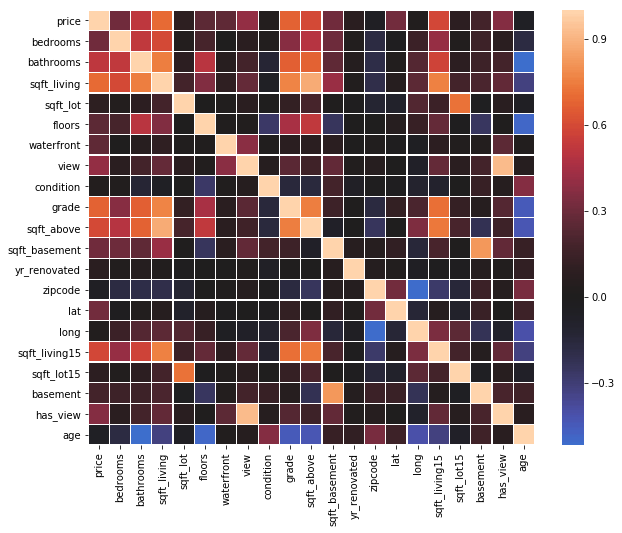

In [20]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kc.corr(), center = 0, linewidths = .25);

It looks like sqft_living, grade has high collinearity with some other features


A correlation is consider high if its absolute value is around 0.7 - 0.8.
Let's use 0.75 as a guide to see how many high correlations there are.
This showed a high correlation between sqft_lot and sqft_lot15.  Let's go ahead and
drop the sqft_lot15 variable

In [21]:
print (abs(kc.corr() > 0.75))

               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_renovated

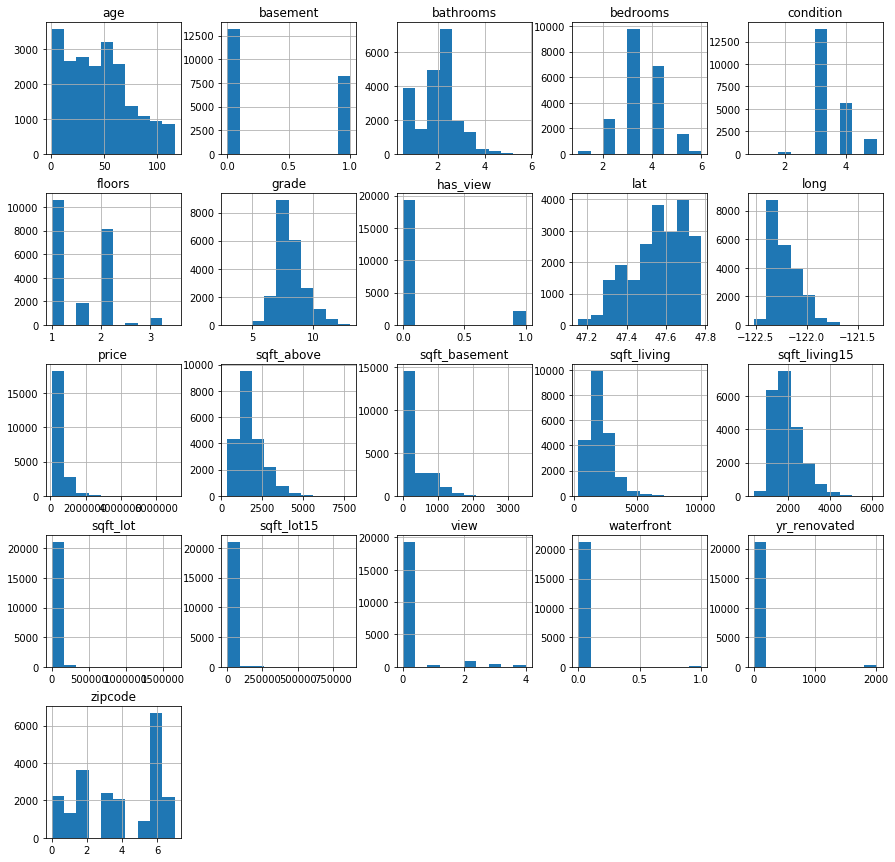

In [22]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers which need to be removed
kc.hist(figsize=(15,15));

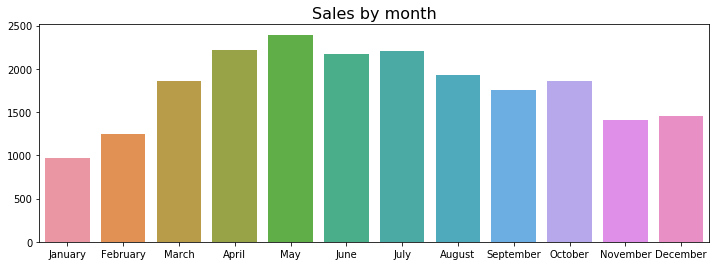

In [23]:
# graph the number of sales by month
# https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(kc.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

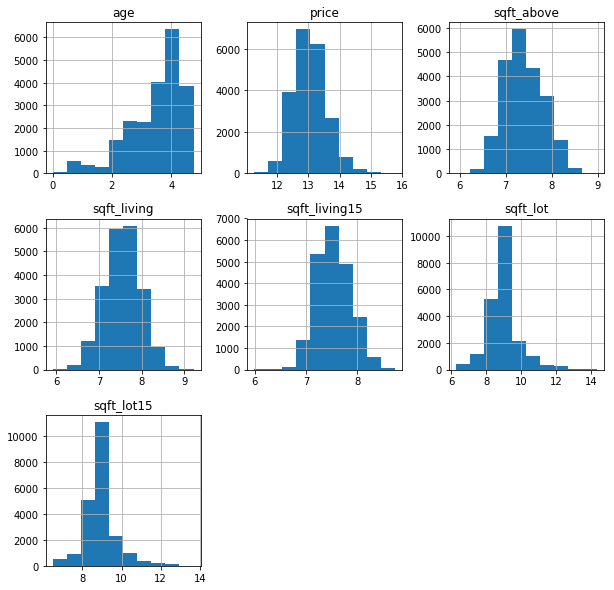

In [24]:
# Normalize the data of the continuous variables using log transformation

import numpy as np
kc_log = pd.DataFrame([])

kc_log['price'] = np.log(kc.price)
kc_log['age'] = np.log(kc.age)
kc_log['sqft_above'] = np.log(kc.sqft_above)
kc_log['sqft_living'] = np.log(kc.sqft_living)
kc_log['sqft_living15'] = np.log(kc.sqft_living15)
kc_log['sqft_lot'] = np.log(kc.sqft_lot)
kc_log['sqft_lot15'] = np.log(kc.sqft_lot15)


# look at the histograms of the transformed data
kc_log.hist(figsize = (10,10));

Because bedrooms, condition, & floors could not be coerced into a normal distribution, they should be
considered for elimination.  Also latitude & longitude should be considered.

In [25]:
# Convert categorical columns to numeric format with one-hot encoding

kc['bedrooms'] = kc.bedrooms.astype('category')
kc['bathrooms'] = kc.bathrooms.astype('category')
kc['floors'] = kc.floors.astype('category')
kc['condition'] = kc.condition.astype('category')
kc['grade'] = kc.grade.astype('category')
kc['has_view'] = kc.has_view.astype('category')
kc['waterfront'] = kc.waterfront.astype('category')
kc['yr_renovated'] = kc.yr_renovated.astype('category')
kc['basement'] = kc.basement.astype('category')



bed_dummies = pd.get_dummies(kc.bedrooms, prefix = 'bedrooms')
bath_dummies = pd.get_dummies(kc.bathrooms, prefix = 'bathrooms')
floors_dummies = pd.get_dummies(kc.floors, prefix = 'floors')
cond_dummies = pd.get_dummies(kc.condition, prefix = 'condition')
grade_dummies = pd.get_dummies(kc.grade, prefix = 'grade')
has_view_dummies = pd.get_dummies(kc.has_view, prefix = 'view')
water_dummies = pd.get_dummies(kc.waterfront, prefix = 'waterfront')
renov_dummies = pd.get_dummies(kc.yr_renovated, prefix = 'yr_renovated')
basement_dummies = pd.get_dummies(kc.basement, prefix = 'basement')
zip_dummies = pd.get_dummies(bins_zip, prefix = 'zip')


# combine the log transformed data with the categorical dummy variables
kc_final = pd.concat([kc_log, bed_dummies, bath_dummies, floors_dummies, cond_dummies, grade_dummies], axis=1)
kc_final = pd.concat([kc_final, has_view_dummies, water_dummies, basement_dummies, zip_dummies], axis=1 )


In [26]:
# set the max_columns attribute in order to view all of the column names with the categorical data
pd.set_option('display.max_columns', None)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,7.908387,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,7.215240,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,7.495542,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [27]:
# rename columns for bathrooms & floors to eliminate decimals

kc_final.rename(columns = {'bathrooms_0.5':'bath_h', 'bathrooms_0.75':'bath_3q', 'bathrooms_1.0':'bath_1'}, inplace=True)
kc_final.rename(columns = {'bathrooms_1.25':'bath1_q','bathrooms_1.5':'bath1_h', 'bathrooms_1.75':'bath1_3q', 'bathrooms_2.0':'bath_2'}, inplace=True)
kc_final.rename(columns = {'bathrooms_2.25':'bath2_q','bathrooms_2.5':'bath2_h', 'bathrooms_2.75':'bath2_3q', 'bathrooms_3.0':'bath_3'}, inplace=True)
kc_final.rename(columns = {'bathrooms_3.25':'bath3_q','bathrooms_3.5':'bath3_h', 'bathrooms_3.75':'bath3_3q', 'bathrooms_4.0':'bath_4'}, inplace=True)
kc_final.rename(columns = {'bathrooms_4.25':'bath4_q','bathrooms_4.5':'bath4_h', 'bathrooms_4.75':'bath4_3q', 'bathrooms_5.0':'bath_5'}, inplace=True)
kc_final.rename(columns = {'bathrooms_5.25':'bath5_q','bathrooms_5.5':'bath5_h', 'bathrooms_5.75':'bath5_3q'}, inplace=True)

kc_final.head(2)

,price,age,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [28]:
# rename floors columns to remove decimals

kc_final.rename(columns = {'floors_1.0':'floors_1', 'floors_1.5':'floors_1h'}, inplace=True)
kc_final.rename(columns = {'floors_2.0':'floors_2', 'floors_2.5':'floors_2h'}, inplace=True)
kc_final.rename(columns = {'floors_3.0':'floors_3', 'floors_3.5':'floors_3h'}, inplace=True)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98009]","zip_(98009, 98023]","zip_(98023, 98041]","zip_(98041, 98056]","zip_(98056, 98074]","zip_(98074, 98100]","zip_(98100, 98150]","zip_(98150, 98199]"
0,12.309982,4.110874,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,7.908387,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,7.215240,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,7.495542,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


In [29]:
# rename zipcode columns to remove issues with bin names

kc_final.rename(columns = {'zip_(98000, 98009]':'zip_1', 'zip_(98009, 98023]':'zip_2'}, inplace=True)
kc_final.rename(columns = {'zip_(98023, 98041]':'zip_3', 'zip_(98041, 98056]':'zip_4'}, inplace=True)
kc_final.rename(columns = {'zip_(98056, 98074]':'zip_5', 'zip_(98074, 98100]':'zip_6'}, inplace=True)
kc_final.rename(columns = {'zip_(98100, 98150]':'zip_7', 'zip_(98150, 98199]':'zip_8'}, inplace=True)

kc_final.head()

,price,age,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,4.110874,7.073270,7.073270,7.200425,8.639411,8.639411,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,7.432484,8.887653,8.941022,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,12.100712,4.418841,6.646391,6.646391,7.908387,9.210340,8.994917,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,7.215240,8.517193,8.517193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,13.142166,3.367296,7.426549,7.426549,7.495542,8.997147,8.923058,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


## Modeling Our Data

* Build single linear regression models on the continuous variables
* Run multi linear regression on the data after removing problem features or features that arenot significant

In [30]:
# run an OLS regression on the log transformed continuous variables

col_names = kc_final.columns[1:6]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]

Kings County:  Price ~ sqft_living
-------------------------------------
['sqft_living', 0.45110252250039684, 6.753046881544533, 0.8336757752775648, 0.0]

Kings County:  Price ~ sqft_living15
-------------------------------------
['sqft_living15', 0.3666021794767529, 5.738572231349174, 0.9692737026353657, 0.0]

Kings County:  Price ~ sqft_lot
-------------------------------------
['sqft_lot', 0.01835294091421613, 12.338667712384398, 0.07864813332304832, 1.942415727701488e-88]


In [31]:
# Convert the results table to a dataframe
print ()
print ('1st iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)



1st iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0
3,sqft_living,0.451103,6.75305,0.833676,0
4,sqft_living15,0.366602,5.73857,0.969274,0
5,sqft_lot,0.0183529,12.3387,0.0786481,1.94242e-88


The p-value does not give us any significant value that shows a variable should be removed.
The three highest r-squared values are for grade, sqft_above, and sqft_living 

Remove obvious variables such as:
    p-value > .05 &
    r squared value that are very close to 0

In [32]:
# drop the columns with lowest r-squared values and also drop sqft_living since it is highly correlated
# with other features

drop_cols = ['sqft_lot', 'sqft_lot15', 'sqft_living']
kc_final = kc_final.drop(drop_cols, axis=1)


After removing the first round of variables, run the OLS again on the remaining variables.
Since a few columns have been deleted, the column indices need to be adjusted

In [33]:
# check the column indices as some have been removed
kc_final.head(2)

,price,age,sqft_above,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,4.110874,7.073270,7.200425,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.432484,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [34]:
col_names = kc_final.columns[1:3]

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]


In [35]:
# Convert the continuous variables results table to a dataframe
print ()
print ('2nd Iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)


2nd Iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0


In [36]:
# drop columns
drop_cols =['age']

kc_final = kc_final.drop(drop_cols, axis=1)


In [37]:
# use statsmodels to run ols on all the data  *** Mod 1 sec 11- multiple linear regression in statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     821.3
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        15:26:44   Log-Likelihood:                -4126.6
No. Observations:               21461   AIC:                             8369.
Df Residuals:                   21403   BIC:                             8832.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4275      0.031     77.159      0.000       2.366       2.489
sqft_above        0.3677      0.011     32.683      0.000       0.346       0.390
sqft_living15     0.3716      0.010     35.640      0.000       0.351       0.392
bedrooms_1        0.4671      0.019     24.031      0.000       0.429       0.505
bedrooms_2        0.4603      0.008     55.471      0.000       0.444       0.477
bedrooms_3        0.3842      0.008     50.360      0.000       0.369       0.399
bedrooms_4        0.3799      0.009     43.994      0.000       0.363       0.397
bedrooms_5        0.3859      0.011     36.574      0.000       0.365       0.407
bedrooms_6        0.3501      0.018     19.869      0.000       0.316       0.385
bath_h           -0.2370      0.141     -1.678      0.093      -0.514       0.040
bath_3q           0.0355      0.039      0.906      0.365      -0.041       0.112
bath_1            0.0129      0.017      0.777      0.437      -0.020       0.045
bath1_q           0.0098      0.095      0.104      0.917      -0.176       0.196
bath1_h          -0.0054      0.017     -0.317      0.751      -0.038       0.028
bath1_3q          0.0443      0.016      2.771      0.006       0.013       0.076
bath_2            0.0382      0.016      2.334      0.020       0.006       0.070
bath2_q           0.0357      0.016      2.224      0.026       0.004       0.067
bath2_h           0.0049      0.015      0.323      0.747      -0.025       0.035
bath2_3q          0.0498      0.017      2.970      0.003       0.017       0.083
bath_3            0.0464      0.018      2.609      0.009       0.012       0.081
bath3_q           0.0891      0.018      4.827      0.000       0.053       0.125
bath3_h           0.0823      0.018      4.617      0.000       0.047       0.117
bath3_3q          0.1811      0.027      6.732      0.000       0.128       0.234
bath_4            0.1597      0.029      5.570      0.000       0.104       0.216
bath4_q           0.1883      0.036      5.291      0.000       0.119       0.258
bath4_h           0.1432      0.033      4.401      0.000       0.079       0.207
bath4_3q          0.2193      0.063      3.464      0.001       0.095       0.343
bath_5            0.2225      0.065      3.443      0.001       0.096       0.349
bath5_q           0.2998      0.083      3.628      0.000       0.138       0.462
bath5_h           0.3546      0.097      3.659      0.000       0.165       0.545
bath5_3q          0.4522      0.167      2.712      0.007       0.125       0.779
floors_1          0.4022      0.021     19.448      0.000       0.362       0.443
floors_1h         0.4666      0.021     21.750      0.000       0.425       0.509
floors_2          0.3504      0.021     16.962      0.000       0.310       0.391
floors_2h         0.4276      0.028     15.010   

In [38]:
kc_final.head(2)

,price,sqft_above,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bath_h,bath_3q,bath_1,bath1_q,bath1_h,bath1_3q,bath_2,bath2_q,bath2_h,bath2_3q,bath_3,bath3_q,bath3_h,bath3_3q,bath_4,bath4_q,bath4_h,bath4_3q,bath_5,bath5_q,bath5_h,bath5_3q,floors_1,floors_1h,floors_2,floors_2h,floors_3,floors_3h,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8
0,12.309982,7.073270,7.200425,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,13.195614,7.682482,7.432484,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [39]:
# now run an OLS regression with the categorical variables
col_names = kc_final.columns[2:] 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ sqft_living15
-------------------------------------
['sqft_living15', 0.3666021794767529, 5.738572231349174, 0.9692737026353657, 0.0]

Kings County:  Price ~ bedrooms_1
-------------------------------------
['bedrooms_1', 0.007676823034775571, 13.049995627372033, -0.48223059371888677, 7.599300726158697e-38]

Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]

Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]

Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]

Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800

['view_1', 0.10771136424608607, 12.989074687379368, 0.5789532681687458, 0.0]

Kings County:  Price ~ waterfront_0
-------------------------------------
['waterfront_0', 0.028446246424925437, 14.119999035881362, -1.0816653537736753, 1.0809976400179874e-136]

Kings County:  Price ~ waterfront_1
-------------------------------------
['waterfront_1', 0.028446246424925437, 13.038333682107954, 1.0816653537736696, 1.0809976400214956e-136]

Kings County:  Price ~ basement_0
-------------------------------------
['basement_0', 0.04259005405397931, 13.182538990415555, -0.22219931281819172, 4.086144879106148e-205]

Kings County:  Price ~ basement_1
-------------------------------------
['basement_1', 0.04259005405397942, 12.960339677597373, 0.222199312818191, 4.086144879116379e-205]

Kings County:  Price ~ zip_1
-------------------------------------
['zip_1', 0.00546252552148041, 13.032414293779787, 0.12681426181805838, 2.1876400589994485e-27]

Kings County:  Price ~ zip_2
-----------------------

In [40]:
# convert the categorical variables results table to a dataframe
# set default to dispaly all rows
pd.set_option('display.max_rows', None)

print ()
print ('1st iteration - OLS with categorical variables')
pd.DataFrame(results)


1st iteration - OLS with categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,sqft_living15,0.366602,5.73857,0.969274,0
2,bedrooms_1,0.00767682,13.05,-0.482231,7.5993e-38
3,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
4,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
5,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
6,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
7,bedrooms_6,0.00506517,13.0414,0.336171,1.64998e-25
8,bath_h,0.000373569,13.0457,-0.741302,0.00463218
9,bath_3q,0.00375988,13.0474,-0.559084,2.45579e-19


With the first pass on categorical variables, p-values for bath1_q, floors_3h, and grade_3 are above the .05 threshold.
Low r-squared values include:
all condition columns
bath_h
floors_1h, floors_2h, floors_3h
grade_3




In [41]:
# eliminate categorical variables with low r-squared valuess

drop_cols1 = ['bath_h','bath_3q', 'bath1_q', 'bath1_3q', 'bath_2', 'bath2_q', 'bath2_h']
drop_cols2 = ['bath4_3q','bath_5', 'bath5_q', 'bath5_h']
drop_cols3 = ['bedrooms_1','bedrooms_6', 'floors_1h', 'floors_2h', 'floors_3', 'floors_3h']
drop_cols4 = ['condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5'] 
drop_cols5 = ['grade_3', 'grade_4', 'grade_13']
drop_cols6 = ['zip_1', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7']

kc_final = kc_final.drop(drop_cols1, axis=1)
kc_final = kc_final.drop(drop_cols2, axis=1)
kc_final = kc_final.drop(drop_cols3, axis=1)
kc_final = kc_final.drop(drop_cols4, axis=1)
kc_final = kc_final.drop(drop_cols5, axis=1)
kc_final = kc_final.drop(drop_cols6, axis=1)

In [42]:
# now run a second OLS regression with the remaining categorical variables and the dependent variable
col_names = kc_final.columns[2:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ sqft_living15
-------------------------------------
['sqft_living15', 0.3666021794767529, 5.738572231349174, 0.9692737026353657, 0.0]

Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]

Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]

Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]

Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]

Kings County:  Price ~ bath_1
-------------------------------------
['bath_1', 0.11577131836182697, 13.12875361812366, -0.4647766760129499, 0.0]


In [43]:
 # convert the remaining categorical variable results table to a dataframe
print ()
print ('2nd iteration - OLS with categorical variables')
pd.DataFrame(results)


2nd iteration - OLS with categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,sqft_living15,0.366602,5.73857,0.969274,0
2,bedrooms_2,0.0325165,13.0818,-0.282288,2.76745e-156
3,bedrooms_3,0.0362112,13.1369,-0.200031,3.88913e-174
4,bedrooms_4,0.0535685,12.9625,0.259802,6.61354e-259
5,bedrooms_5,0.033042,13.0187,0.363581,8.07351e-159
6,bath_1,0.115771,13.1288,-0.464777,0
7,bath1_h,0.0126526,13.0614,-0.235467,2.23521e-61
8,bath2_3q,0.0141627,13.0306,0.273454,1.55849e-68
9,bath_3,0.0111592,13.0351,0.302533,2.62541e-54


In [44]:
# 2nd run - ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1122.
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        15:26:57   Log-Likelihood:                -6004.7
No. Observations:               21461   AIC:                         1.208e+04
Df Residuals:                   21428   BIC:                         1.234e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7876      0.042     90.249      0.000       3.705       3.870
sqft_above        0.3008      0.012     26.069      0.000       0.278       0.323
sqft_living15     0.2445      0.011     22.332      0.000       0.223       0.266
bedrooms_2        0.0546      0.017      3.290      0.001       0.022       0.087
bedrooms_3       -0.0562      0.016     -3.583      0.000      -0.087      -0.025
bedrooms_4       -0.0504      0.016     -3.164      0.002      -0.082      -0.019
bedrooms_5       -0.0290      0.017     -1.664      0.096      -0.063       0.005
bath_1            0.0162      0.008      2.087      0.037       0.001       0.031
bath1_h          -0.0116      0.009     -1.250      0.211      -0.030       0.007
bath2_3q          0.0303      0.010      3.018      0.003       0.011       0.050
bath_3            0.0454      0.012      3.657      0.000       0.021       0.070
bath3_q           0.0924      0.014      6.466      0.000       0.064       0.120
bath3_h           0.0601      0.013      4.529      0.000       0.034       0.086
bath3_3q          0.1958      0.027      7.270      0.000       0.143       0.249
bath_4            0.1393      0.029      4.728      0.000       0.082       0.197
bath4_q           0.1824      0.038      4.772      0.000       0.107       0.257
bath4_h           0.1198      0.034      3.500      0.000       0.053       0.187
bath5_3q          0.6314      0.188      3.360      0.001       0.263       1.000
floors_1         -0.1658      0.007    -22.491      0.000      -0.180      -0.151
floors_2         -0.2089      0.008    -27.252      0.000      -0.224      -0.194
grade_5          -0.3718      0.056     -6.594      0.000      -0.482      -0.261
grade_6          -0.1996      0.053     -3.756      0.000      -0.304      -0.095
grade_7          -0.0475      0.053     -0.900      0.368      -0.151       0.056
grade_8           0.1081      0.053      2.041      0.041       0.004       0.212
grade_9           0.3154      0.053      5.902      0.000       0.211       0.420
grade_10          0.4757      0.054      8.779      0.000       0.370       0.582
grade_11          0.6189      0.056     11.017      0.000       0.509       0.729
grade_12          0.8183      0.065     12.632      0.000       0.691       0.945
view_0            1.8021      0.021     85.964      0.000       1.761       1.843
view_1            1.9855      0.022     91.164      0.000       1.943       2.028
waterfront_0      1.6533      0.024     70.265      0.000       1.607       1.699
waterfront_1      2.1343      0.027     79.899      0.000       2.082       2.187
basement_0        1.7840      0.022     81.983      0.000       1.741       1.827
basement_1        2.0036      0.021     97.335      0.000       1.963       2.044
zip_2            -0.2956      0.009    -32.253   

In [45]:
# dropped columns
drop_cols1 = ['grade_8', 'zip_8']
drop_cols2 = ['bath1_h', 'bath2_3q', 'bath_3', 'bath3_3q', 'bath_4', 'bath4_q', 'bath4_h', 'bath5_3q']
kc_final = kc_final.drop(drop_cols1, axis=1)
kc_final = kc_final.drop(drop_cols2, axis=1)


In [46]:
# use statsmodels to run ols on all the data  *** Mod 1 sec 11- multiple linear regression in statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1571.
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        15:27:09   Log-Likelihood:                -6260.3
No. Observations:               21461   AIC:                         1.257e+04
Df Residuals:                   21438   BIC:                         1.275e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7726      0.038    100.212      0.000       3.699       3.846
sqft_above        0.3176      0.011     27.839      0.000       0.295       0.340
sqft_living15     0.2477      0.011     22.498      0.000       0.226       0.269
bedrooms_2        0.0372      0.017      2.247      0.025       0.005       0.070
bedrooms_3       -0.0770      0.016     -4.941      0.000      -0.107      -0.046
bedrooms_4       -0.0719      0.016     -4.538      0.000      -0.103      -0.041
bedrooms_5       -0.0378      0.017     -2.159      0.031      -0.072      -0.003
bath_1            0.0160      0.008      2.117      0.034       0.001       0.031
bath3_q           0.0659      0.014      4.657      0.000       0.038       0.094
bath3_h           0.0290      0.013      2.225      0.026       0.003       0.055
floors_1         -0.1761      0.007    -23.685      0.000      -0.191      -0.162
floors_2         -0.2074      0.008    -26.834      0.000      -0.223      -0.192
grade_5          -0.4805      0.023    -21.200      0.000      -0.525      -0.436
grade_6          -0.3177      0.010    -30.594      0.000      -0.338      -0.297
grade_7          -0.1582      0.006    -25.915      0.000      -0.170      -0.146
grade_9           0.2122      0.008     25.844      0.000       0.196       0.228
grade_10          0.3890      0.012     32.949      0.000       0.366       0.412
grade_11          0.5524      0.019     29.680      0.000       0.516       0.589
grade_12          0.7647      0.038     20.253      0.000       0.691       0.839
view_0            1.8012      0.019     95.988      0.000       1.764       1.838
view_1            1.9714      0.020     99.825      0.000       1.933       2.010
waterfront_0      1.6534      0.022     76.204      0.000       1.611       1.696
waterfront_1      2.1191      0.025     84.240      0.000       2.070       2.168
basement_0        1.7726      0.020     89.925      0.000       1.734       1.811
basement_1        2.0000      0.018    109.083      0.000       1.964       2.036
zip_2            -0.2808      0.009    -30.422      0.000      -0.299      -0.263
==============================================================================
Omnibus:                        9.650   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.332
Skew:                           0.019   Prob(JB):                      0.00571
Kurtosis:                       3.100   Cond. No.                     1.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.46e-26. This might indicate that there are
strong multicollinearity problems or that the design

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
y  = kc_final['price']
X = kc_final.drop('price', axis=1)
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X, y)
selector.ranking_

array([ 1,  1,  9, 12, 13, 14, 16, 11, 15,  4,  5,  2,  6,  7,  1,  1,  1,
        1,  3, 10,  1,  1,  8,  1,  1])

In [48]:
kc_final.head(2)

,price,sqft_above,sqft_living15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bath_1,bath3_q,bath3_h,floors_1,floors_2,grade_5,grade_6,grade_7,grade_9,grade_10,grade_11,grade_12,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_2
0,12.309982,7.073270,7.200425,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,13.195614,7.682482,7.432484,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0


In [49]:
kc_final = kc_final.drop(kc_final.columns[2:11], axis=1)
kc_final.head()

,price,sqft_above,floors_2,grade_5,grade_6,grade_7,grade_9,grade_10,grade_11,grade_12,view_0,view_1,waterfront_0,waterfront_1,basement_0,basement_1,zip_2
0,12.309982,7.073270,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
1,13.195614,7.682482,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,12.100712,6.646391,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
3,13.311329,6.956545,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
4,13.142166,7.426549,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [50]:
kc_final = kc_final.drop('view_0', axis=1)

In [51]:
drop_cols = ['grade_6', 'grade_7', 'basement_0', 'waterfront_0']
kc_final = kc_final.drop(drop_cols, axis=1)

In [52]:
# 2nd run - ols

outcome = 'price'
predictors = kc_final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula = formula, data = kc_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2578.
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        15:27:38   Log-Likelihood:                -7525.5
No. Observations:               21461   AIC:                         1.507e+04
Df Residuals:                   21449   BIC:                         1.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.7005      0.061    143.335      0.000       8.582       8.819
sqft_above       0.5657      0.008     67.376      0.000       0.549       0.582
floors_2        -0.0553      0.006     -9.041      0.000      -0.067      -0.043
grade_5         -0.2338      0.023    -10.310      0.000      -0.278      -0.189
grade_9          0.2881      0.008     34.709      0.000       0.272       0.304
grade_10         0.4511      0.012     37.624      0.000       0.428       0.475
grade_11         0.6018      0.019     31.445      0.000       0.564       0.639
grade_12         0.7912      0.040     19.978      0.000       0.714       0.869
view_1           0.2206      0.009     25.792      0.000       0.204       0.237
waterfront_1     0.4597      0.030     15.447      0.000       0.401       0.518
basement_1       0.2821      0.005     54.401      0.000       0.272       0.292
zip_2           -0.3059      0.010    -31.380      0.000      -0.325      -0.287
==============================================================================
Omnibus:                        5.193   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.915
Skew:                           0.000   Prob(JB):                       0.0856
Kurtosis:                       2.926   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
kc_final.head(2)

,price,sqft_above,floors_2,grade_5,grade_9,grade_10,grade_11,grade_12,view_1,waterfront_1,basement_1,zip_2
0,12.309982,7.073270,0,0,0,0,0,0,0,0,0,0
1,13.195614,7.682482,1,0,0,0,0,0,0,0,1,0


## Model Validation 

### Use a train-test-split for model validation

In [54]:
X = kc_final.drop(['price'], axis=1)
y = kc_final['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

# calculate the residuals
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

#print ('Training Data Residuals: ', train_residuals)
#print ()
#print ()
#print ('Test Data Residuals: ', test_residuals)




In [55]:
print (linreg.score(X,y))

0.5692934187375209


In [56]:
# mean squarred error
mse_train = np.sum((y_train - yhat_train)**2) / len(y_train)
mse_test= np.sum((y_test - yhat_test)**2) / len(y_test)

print ('Train Mean Squarred Error: ', mse_train)
print ('Test Mean Squarred Error: ', mse_test)

Train Mean Squarred Error:  0.11801532799321894
Test Mean Squarred Error:  0.11827706258398149


## Final Results:

R-squared:  .569
This process resulted in a model that is 56.9% accurate.
The final model included the features of:

* sqft_above
* floors_2
* grade_5
* grade_9
* grade_10
* grade_11
* grade_12
* view_1
* basement_1
* waterfront_1
* zip_2

## Future Exploration

I would like to investigate how to eliminate more variables while imploving the r-squared value. In this particular model, I converted several features to categorical variables which greatly increased the number of features in the dataset.  I would consider possibly experimenting with eliminating different combinations of these features before converting them to see what kind of results I could get.  I also think that the zipcodes might need to be binned differently.